In [1]:
# ingest the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"data\\gemstone.csv")

## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

https://www.vrai.com/journal/post/diamond-cut

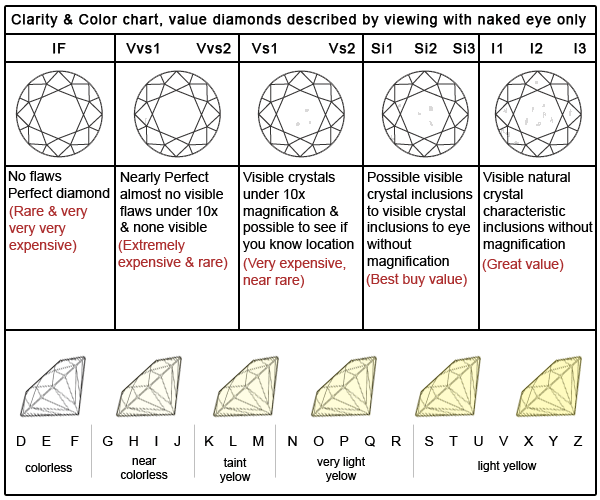

In [4]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [6]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
185953,185953,0.50,Ideal,D,VS2,60.6,57.0,5.12,5.10,3.10,1822
8942,8942,2.01,Very Good,H,SI2,59.6,62.0,8.04,8.09,4.85,11925
3985,3985,0.90,Very Good,G,VS2,63.5,58.0,6.04,6.08,3.84,4113
22830,22830,0.50,Premium,D,SI1,61.3,60.0,5.10,5.05,3.11,1585
127784,127784,0.31,Ideal,F,VS2,61.7,55.0,4.34,4.37,2.68,583


In [7]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
data = data.drop(columns='id', axis=1)

In [10]:
data.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
112464,0.40,Premium,I,VS2,62.6,59.0,4.67,4.70,2.94,692
29654,1.03,Ideal,G,SI2,60.6,57.0,6.56,6.51,3.96,4157
176660,0.70,Ideal,E,SI1,61.1,56.0,5.73,5.76,3.52,2817
61651,0.55,Ideal,F,VVS2,61.7,57.0,5.29,5.26,3.25,2013
166742,0.31,Ideal,G,VVS1,62.6,57.0,4.37,4.35,2.73,789


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.shape

(193573, 10)

In [13]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [14]:
data.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

In [15]:
categorical_columns = data.columns[data.dtypes == 'object']
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [16]:
numerical_columns = data.columns[data.dtypes != 'object']
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [17]:
data[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [18]:
data_summary = round(data[numerical_columns].describe().T,2)
data_summary

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.79,0.46,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.82,1.08,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.23,1.92,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.72,1.11,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.72,1.10,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.53,0.69,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.16,4034.37,326.0,951.00,2401.00,5408.00,18818.00


In [19]:
# coefficient of variance(CoV): ratio between S.D and Mean
data_summary['CoV'] = round((data_summary['std'] / data_summary['mean'])*100,2)
data_summary

,count,mean,std,min,25%,50%,75%,max,CoV
carat,193573.0,0.79,0.46,0.2,0.40,0.70,1.03,3.50,58.23
depth,193573.0,61.82,1.08,52.1,61.30,61.90,62.40,71.60,1.75
table,193573.0,57.23,1.92,49.0,56.00,57.00,58.00,79.00,3.35
x,193573.0,5.72,1.11,0.0,4.70,5.70,6.51,9.65,19.41
y,193573.0,5.72,1.10,0.0,4.71,5.72,6.51,10.01,19.23
z,193573.0,3.53,0.69,0.0,2.90,3.53,4.03,31.30,19.55
price,193573.0,3969.16,4034.37,326.0,951.00,2401.00,5408.00,18818.00,101.64


## Univariate Analysis of categorical Features

In [20]:
for i in categorical_columns:
    print(i)
    print(f"Total nuinque: {data[i].nunique()}")
    print()
    print(round(data[i].value_counts(normalize=True)*100,2))
    print('********************************************')
    print()


cut
Total nuinque: 5

cut
Ideal        47.76
Premium      25.78
Very Good    19.41
Good          6.00
Fair          1.04
Name: proportion, dtype: float64
********************************************

color
Total nuinque: 7

color
G    22.93
E    18.53
F    17.70
H    15.91
D    12.55
I     9.05
J     3.34
Name: proportion, dtype: float64
********************************************

clarity
Total nuinque: 8

clarity
SI1     27.52
VS2     24.81
VS1     15.84
SI2     15.75
VVS2     8.14
VVS1     5.49
IF       2.18
I1       0.26
Name: proportion, dtype: float64
********************************************



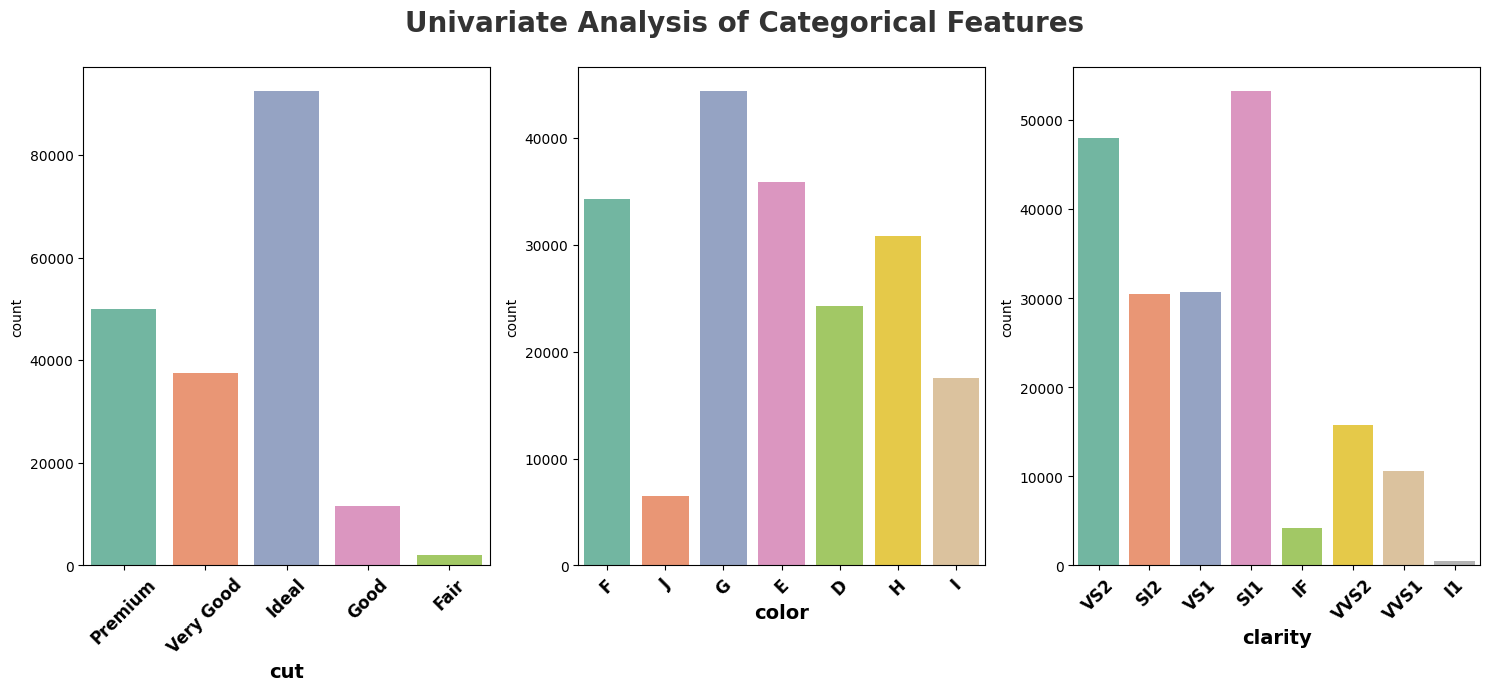

In [21]:
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_columns)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=categorical_columns[i], data=data, hue=categorical_columns[i], palette='Set2', legend=False)
    plt.xlabel(categorical_columns[i], fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.tight_layout()

plt.show()

## Univariate Analysis of Numerical Data

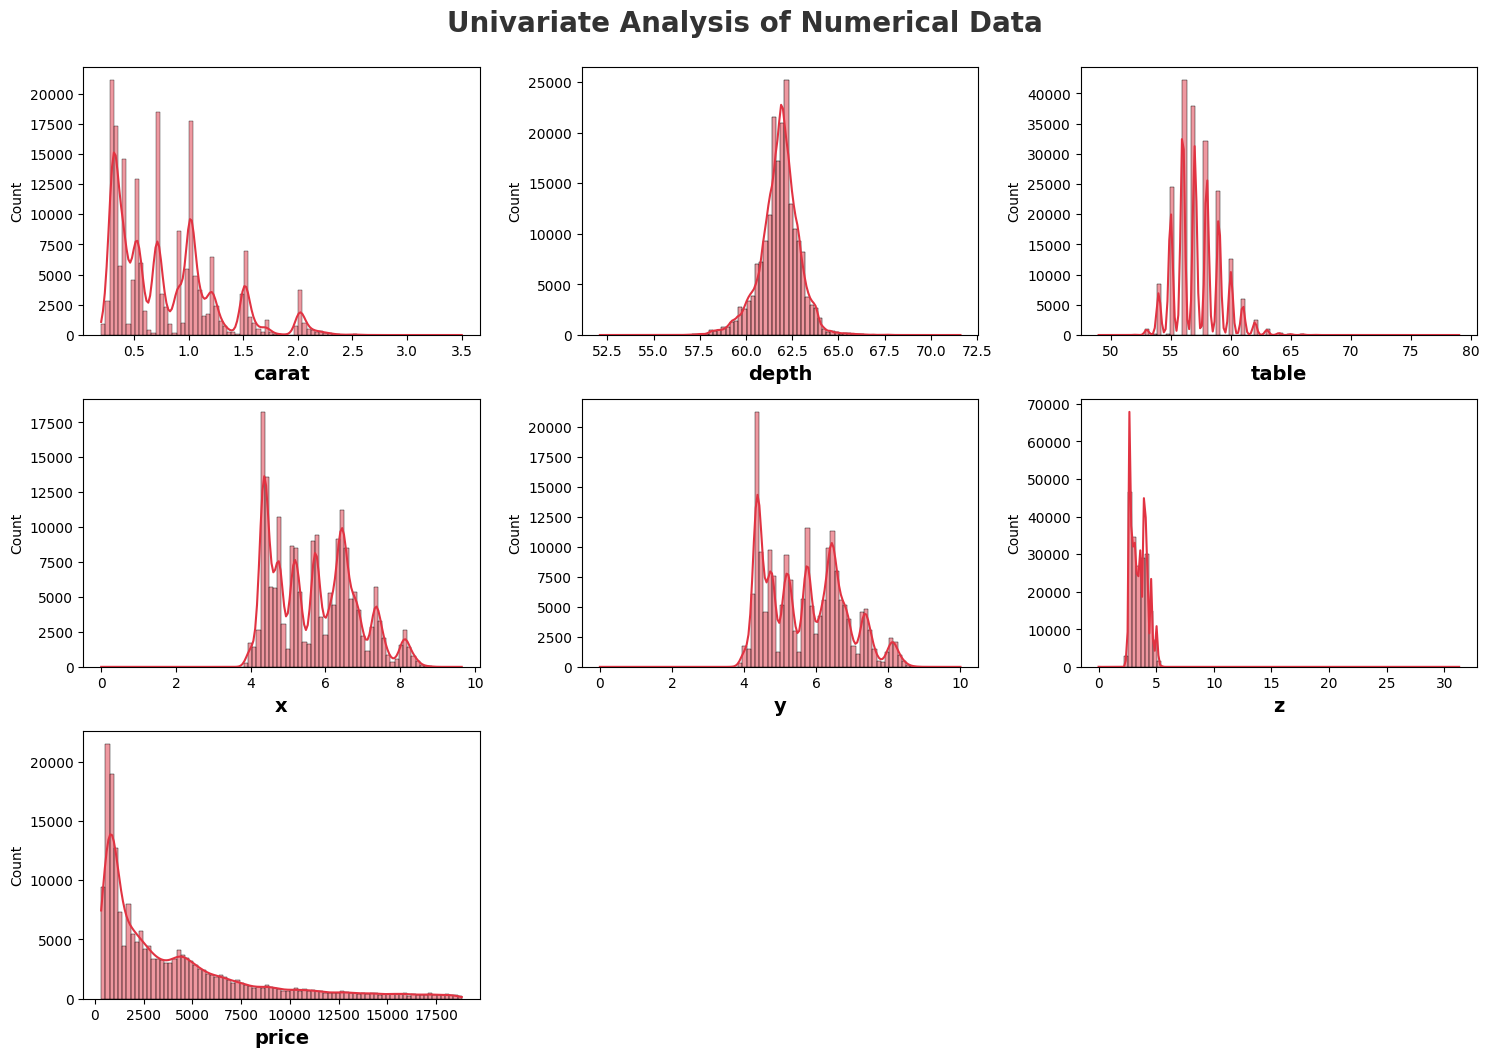

In [22]:
plt.figure(figsize=(15,20))
plt.suptitle("Univariate Analysis of Numerical Data",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(len(numerical_columns)):
    plt.subplot(6, 3, i+1)
    # Get a color from the 'Set2' palette
    palette = sns.color_palette("rocket")
    color = palette[3]  # Use the first color from the palette
    sns.histplot(data[numerical_columns[i]], bins=86, kde=True, color=color)
    plt.xlabel(numerical_columns[i], fontsize=14, fontweight='bold')
    plt.tight_layout()
plt.show()

In [23]:
for i in numerical_columns:
    skew_val = data[i].skew()
    print(i)
    print(f"Skew: {round(skew_val, 2)}", end=" ")
    if skew_val > 1:
        print("(Highly Right Skewed)")
    elif skew_val > 0.5:
        print("(Moderately Right Skewed)")
    elif skew_val < -1:
        print("(Highly Left Skewed)")
    elif skew_val < -0.5:
        print("(Moderately Left Skewed)")
    else:
        print("(Approximately Symmetric)")
    print()


carat
Skew: 1.0 (Moderately Right Skewed)

depth
Skew: -0.28 (Approximately Symmetric)

table
Skew: 0.62 (Moderately Right Skewed)

x
Skew: 0.36 (Approximately Symmetric)

y
Skew: 0.36 (Approximately Symmetric)

z
Skew: 0.69 (Moderately Right Skewed)

price
Skew: 1.61 (Highly Right Skewed)



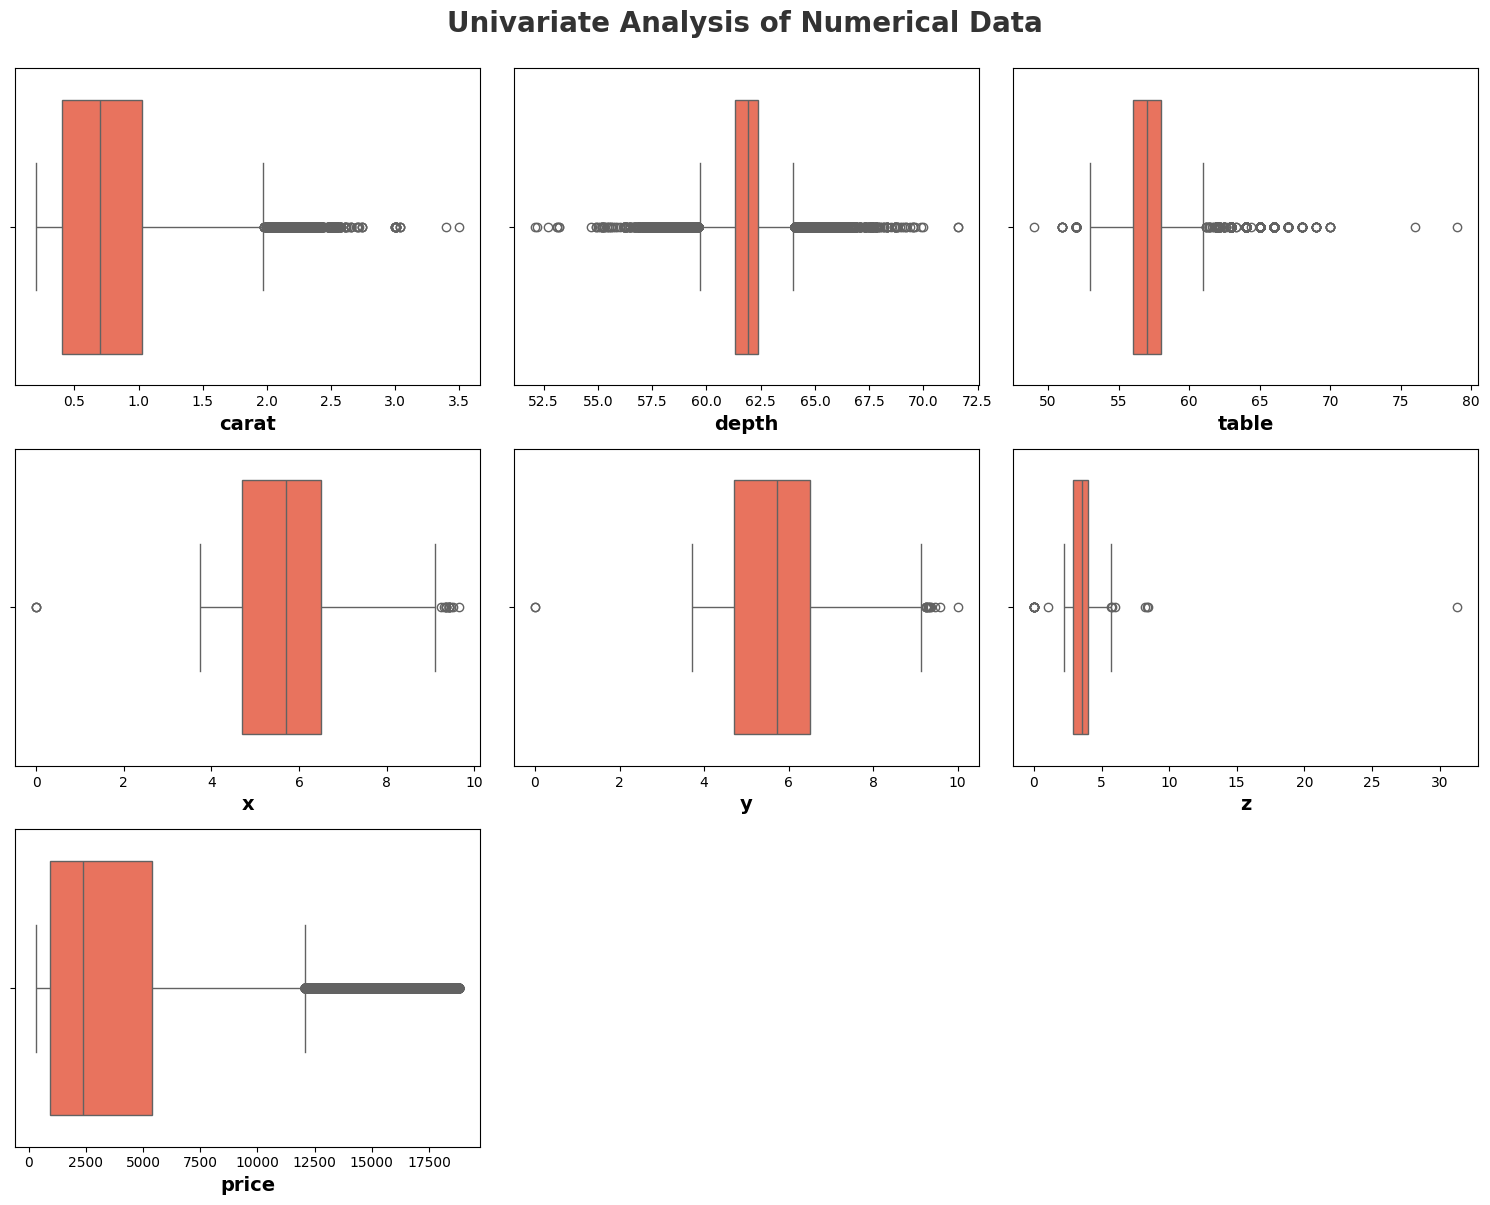

In [24]:
plt.figure(figsize=(15,12))
plt.suptitle("Univariate Analysis of Numerical Data",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[numerical_columns[i]], color="tomato")
    plt.xlabel(numerical_columns[i], fontsize=14, fontweight='bold')
    plt.tight_layout()
plt.show()

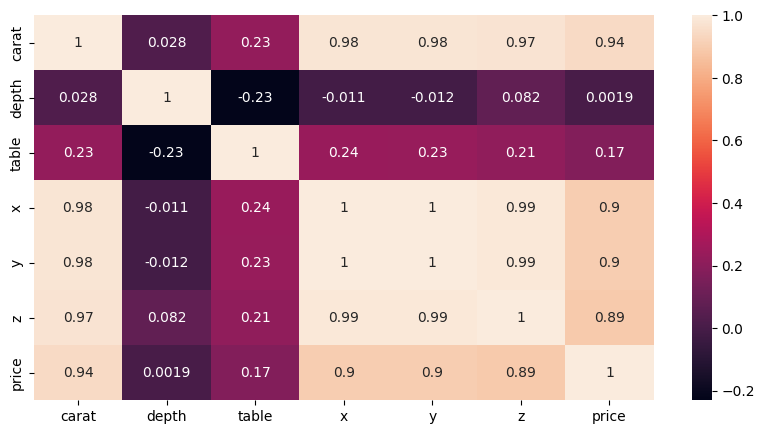

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data[numerical_columns].corr(), annot=True)
plt.show()

In [27]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

## Features Engineering

In [ ]:
# encoding to perform categorical into number

data['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [30]:
data['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [31]:
data['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [32]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [33]:
data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)
data['color'] = data['color'].map(color_map)

In [34]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
